# 题目一：下载并用pandas导入sz50.xlsx的所有股票，索引设置为datetime，将所有股票的keys打印出来。

In [1]:
import numpy as np
import pandas as pd
import talib as ta
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_excel('sz50.xlsx',sheet_name=None,index_col='datetime')
print(data.keys())

odict_keys(['600000.XSHG', '600016.XSHG', '600028.XSHG', '600029.XSHG', '600030.XSHG', '600036.XSHG', '600048.XSHG', '600050.XSHG', '600100.XSHG', '600104.XSHG', '600111.XSHG', '600340.XSHG', '600485.XSHG', '600518.XSHG', '600519.XSHG', '600547.XSHG', '600606.XSHG', '600837.XSHG', '600887.XSHG', '600919.XSHG', '600958.XSHG', '600999.XSHG', '601006.XSHG', '601088.XSHG', '601166.XSHG', '601169.XSHG', '601186.XSHG', '601198.XSHG', '601211.XSHG', '601229.XSHG', '601288.XSHG', '601318.XSHG', '601328.XSHG', '601336.XSHG', '601390.XSHG', '601398.XSHG', '601601.XSHG', '601628.XSHG', '601668.XSHG', '601688.XSHG', '601766.XSHG', '601788.XSHG', '601800.XSHG', '601818.XSHG', '601857.XSHG', '601881.XSHG', '601901.XSHG', '601985.XSHG', '601988.XSHG', '601989.XSHG'])


# 题目二：读取data里的600036这只股票的DataFrame,将其收盘价转换成用Numpy的Array格式，并用talib计算10日均线值，返回ndarray的最后五个值

In [36]:
data = pd.read_excel('sz50.xlsx',sheet_name='600036.XSHG', index_col='datetime')
df = pd.DataFrame(data)

In [20]:
data.close
cl=np.array(data.close)
print(type(cl))
print(ta.MA(data.close.values,10)[-5:])

<class 'numpy.ndarray'>
[108.35  108.741 109.176 110.102 111.666]


# 题目三：将MA的ndarray数据转换成Series格式，并将价格和MA值用Matplotlib展示出来

In [5]:
rolling_mean=data['close'].rolling(window=10,center=False).mean()
ma=np.array(rolling_mean)
s=pd.Series(ma)

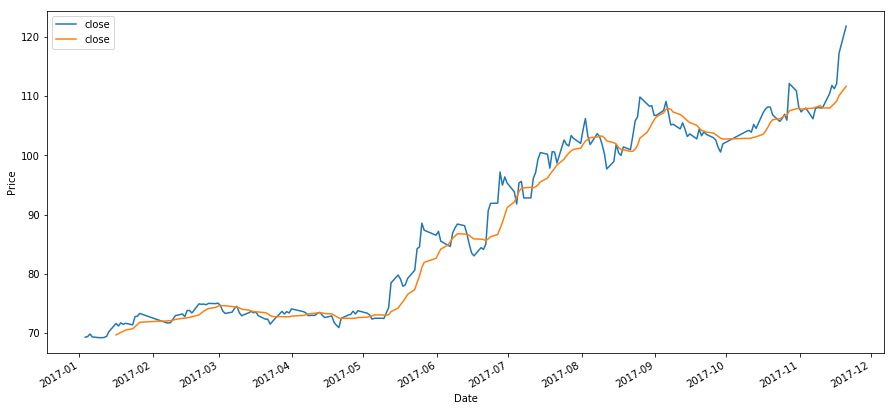

In [6]:
plt.figure(figsize=(15, 7))
plt.subplot()
data['close'].plot()
rolling_mean.plot()
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

# 题目四：用talib计算50只股票的周期为5的ROCR100，生成Dataframe，并将前5只股票的 ROCR100（参数timeperiod=20）用一张图显示出来。

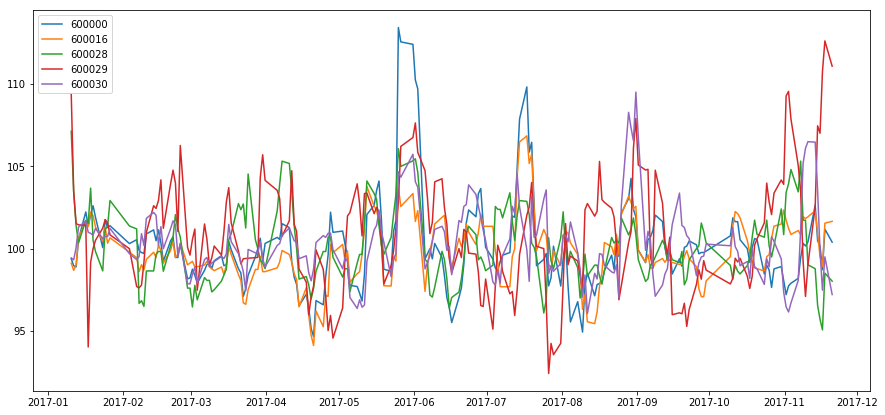

In [72]:
data1 = pd.read_excel('sz50.xlsx',sheet_name='600000.XSHG', index_col='datetime')
data2 = pd.read_excel('sz50.xlsx',sheet_name='600016.XSHG', index_col='datetime')
data3 = pd.read_excel('sz50.xlsx',sheet_name='600028.XSHG', index_col='datetime')
data4 = pd.read_excel('sz50.xlsx',sheet_name='600029.XSHG', index_col='datetime')
data5 = pd.read_excel('sz50.xlsx',sheet_name='600030.XSHG', index_col='datetime')
plt.figure(figsize=(15,7))
plt.plot(ta.ROCR100(data1.close,timeperiod=5))
plt.plot(ta.ROCR100(data2.close,timeperiod=5))
plt.plot(ta.ROCR100(data3.close,timeperiod=5))
plt.plot(ta.ROCR100(data4.close,timeperiod=5))
plt.plot(ta.ROCR100(data5.close,timeperiod=5))
plt.legend(['600000','600016','600028','600029','600030'],loc = 2)
plt.show()

# 题目五：用Panel来计算50只股票的MACD并且输出MACD的Panel的MultiIndex格式。

In [87]:
from datetime import datetime
import pandas as pd
symbol=['600000.XSHG','600016.XSHG','600028.XSHG','600029.XSHG','600030.XSHG','600036.XSHG','600048.XSHG','600050.XSHG','600100.XSHG','600104.XSHG','600111.XSHG','600340.XSHG','600485.XSHG','600518.XSHG','600519.XSHG','600547.XSHG','600606.XSHG','600837.XSHG','600887.XSHG','600919.XSHG','600958.XSHG','600999.XSHG','601006.XSHG','601088.XSHG','601166.XSHG','601169.XSHG','601186.XSHG','601198.XSHG','601211.XSHG', '601229.XSHG','601288.XSHG','601318.XSHG','601328.XSHG','601336.XSHG','601390.XSHG','601398.XSHG','601601.XSHG','601628.XSHG','601668.XSHG','601688.XSHG','601766.XSHG','601788.XSHG', '601800.XSHG','601818.XSHG','601857.XSHG','601881.XSHG','601901.XSHG','601985.XSHG', '601988.XSHG', '601989.XSHG']
data_dict = {}
for s in symbol:
    data =  pd.read_excel('sz50.xlsx',sheetname=s, index_col='datetime')
    data_dict[s] = data.loc['2017-01-03':'2017-11-20']
PN=pd.Panel(data_dict)
print(PN)

<class 'pandas.core.panel.Panel'>
Dimensions: 50 (items) x 215 (major_axis) x 5 (minor_axis)
Items axis: 600000.XSHG to 601989.XSHG
Major_axis axis: 2017-01-03 15:00:00 to 2017-11-20 15:00:00
Minor_axis axis: close to volume


In [88]:
MI=PN.to_frame()

In [90]:
PN=PN.fillna(0)

In [93]:
import talib.abstract as ta
pn_macd=pd.Panel({name:ta.MACD(value) for name, value in PN.iteritems()})
df_macd=pn_macd.transpose(2,1,0).to_frame()
print(df_macd)

                                      macd  macdsignal   macdhist
datetime            minor                                        
2017-02-24 15:00:00 600000.XSHG   0.871114    1.197907  -0.326792
                    600016.XSHG  -0.007077    0.265328  -0.272405
                    600028.XSHG   0.028081    0.052015  -0.023934
                    600029.XSHG   0.221787    0.132200   0.089587
                    600030.XSHG   0.602873    0.620235  -0.017362
                    600036.XSHG   1.291055    1.245643   0.045412
                    600048.XSHG   2.316978    1.771997   0.544982
                    600050.XSHG  -0.105248   -0.189278   0.084029
                    600100.XSHG   0.453028    0.079491   0.373537
                    600104.XSHG   2.271146    2.012658   0.258488
                    600111.XSHG   2.429090    1.926561   0.502529
                    600340.XSHG   8.025312    5.194384   2.830927
                    600485.XSHG   0.000000    0.000000   0.000000
          